In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [3]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

train_dataset=train.flow_from_directory(directory="C:/Users/Yes/OneDrive/Desktop/seg_train",target_size=(50,50),shuffle=True)
test_dataset=train.flow_from_directory(directory="C:/Users/Yes/OneDrive/Desktop/seg_test",target_size=(50,50),shuffle=True)





Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


[28, 16, 23, 18, 4, 17, 29, 17, 6, 2]


C:\Users\Yes\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


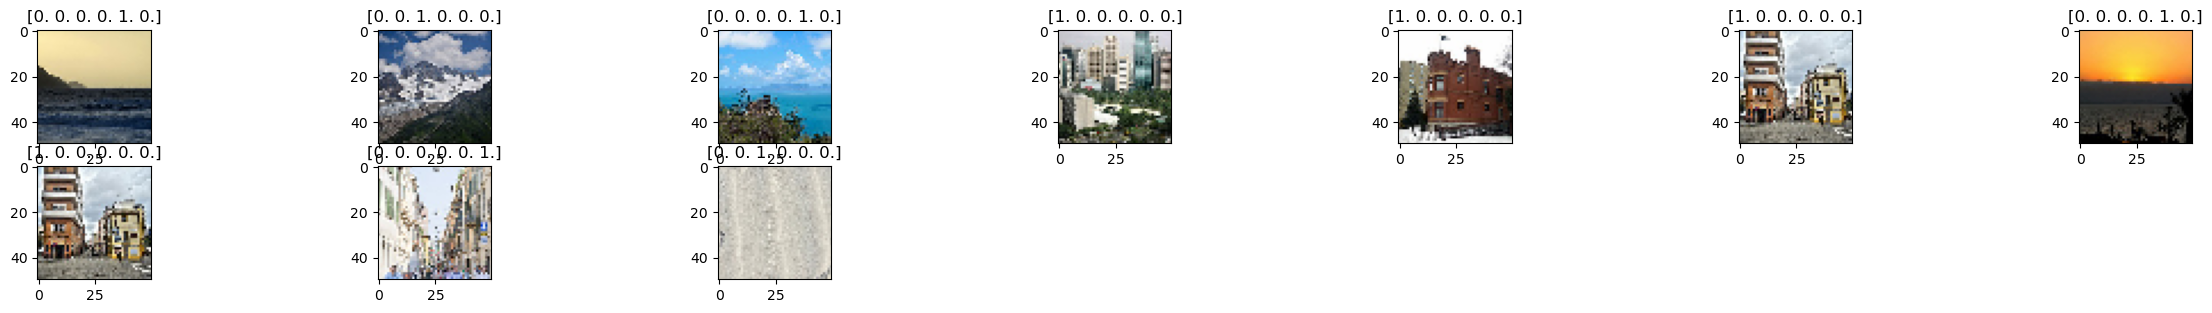

In [4]:
indices=[np.random.randint(32)for i in range(10)]
print(indices)

plt.figure(figsize=(30,5))
for i in enumerate(indices):
    plt.subplot(3,7,i[0]+1)
    plt.imshow(train_dataset[0][0][i[1]])
    plt.title(train_dataset[0][1][i[1]])
plt.show()

In [5]:
values=list(train_dataset.class_indices.values())
keys=list(train_dataset.class_indices)

dics=list(map(lambda x,y:{x:y},values,keys))
from functools import reduce
mappings=reduce(lambda x,y:{**x,**y},dics)
mappings


{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [8]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))




model.add(Conv2D(filters=50,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=50,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(filters=75,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=75,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5,l2=1e-4)
model.add(Dense(units=50,activation='relu',kernel_regularizer=kernel_regularizer))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 activation (Activation)     (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [9]:
model.compile(loss="CategoricalCrossentropy",optimizer='adam',metrics='accuracy')
history=model.fit(train_dataset,batch_size=100,epochs=10,validation_data=test_dataset)


Epoch 1/10
439/439 [==============================] - 490s 1s/step - loss: 1.1978 - accuracy: 0.5202 - val_loss: 1.0599 - val_accuracy: 0.6153
Epoch 2/10
439/439 [==============================] - 123s 280ms/step - loss: 0.9303 - accuracy: 0.6315 - val_loss: 0.9299 - val_accuracy: 0.6630
Epoch 3/10
439/439 [==============================] - 145s 331ms/step - loss: 0.8275 - accuracy: 0.6883 - val_loss: 0.7857 - val_accuracy: 0.7153
Epoch 4/10
439/439 [==============================] - 138s 314ms/step - loss: 0.7372 - accuracy: 0.7339 - val_loss: 0.7298 - val_accuracy: 0.7513
Epoch 5/10
439/439 [==============================] - 179s 408ms/step - loss: 0.6637 - accuracy: 0.7676 - val_loss: 0.7796 - val_accuracy: 0.7460
Epoch 6/10
439/439 [==============================] - 163s 372ms/step - loss: 0.6056 - accuracy: 0.7929 - val_loss: 0.6530 - val_accuracy: 0.7933
Epoch 7/10
439/439 [==============================] - 142s 324ms/step - loss: 0.5585 - accuracy: 0.8102 - val_loss: 0.6063 - va

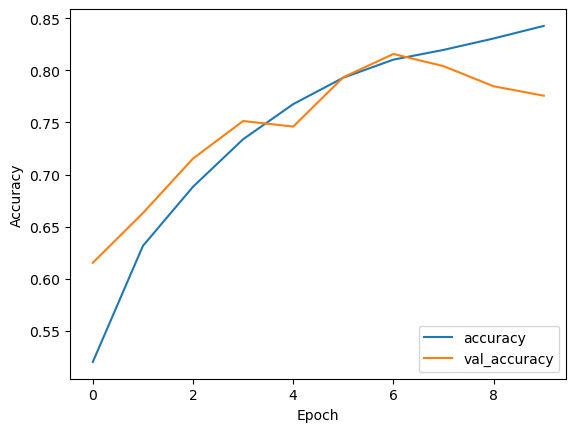

In [10]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

